# Regularization

In [1]:
import seaborn as sns

## Warm up: overfit the model

In [2]:
import numpy as np
import pandas as pd
np.random.seed(42)
x = np.linspace(0, 20, 15)
y = 5 * x + np.random.normal(0.0, 25, 15)
X = x.reshape(15, 1)

In [8]:
X

array([[ 0.        ],
       [ 1.42857143],
       [ 2.85714286],
       [ 4.28571429],
       [ 5.71428571],
       [ 7.14285714],
       [ 8.57142857],
       [10.        ],
       [11.42857143],
       [12.85714286],
       [14.28571429],
       [15.71428571],
       [17.14285714],
       [18.57142857],
       [20.        ]])

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#### Create first polynomial features for X

In [ ]:
## Fit the polynomial features

In [91]:
pt = PolynomialFeatures(degree= 2, include_bias= True,interaction_only=False)

In [92]:
pt.fit(X)

PolynomialFeatures()

In [93]:
X

array([[ 0.        ],
       [ 1.42857143],
       [ 2.85714286],
       [ 4.28571429],
       [ 5.71428571],
       [ 7.14285714],
       [ 8.57142857],
       [10.        ],
       [11.42857143],
       [12.85714286],
       [14.28571429],
       [15.71428571],
       [17.14285714],
       [18.57142857],
       [20.        ]])

In [94]:
## Transform the polynomial features

In [95]:
X_poly= pt.transform(X)


In [96]:
X_poly

array([[  1.        ,   0.        ,   0.        ],
       [  1.        ,   1.42857143,   2.04081633],
       [  1.        ,   2.85714286,   8.16326531],
       [  1.        ,   4.28571429,  18.36734694],
       [  1.        ,   5.71428571,  32.65306122],
       [  1.        ,   7.14285714,  51.02040816],
       [  1.        ,   8.57142857,  73.46938776],
       [  1.        ,  10.        , 100.        ],
       [  1.        ,  11.42857143, 130.6122449 ],
       [  1.        ,  12.85714286, 165.30612245],
       [  1.        ,  14.28571429, 204.08163265],
       [  1.        ,  15.71428571, 246.93877551],
       [  1.        ,  17.14285714, 293.87755102],
       [  1.        ,  18.57142857, 344.89795918],
       [  1.        ,  20.        , 400.        ]])

In [97]:
from sklearn.preprocessing import PolynomialFeatures

In [98]:
pt.get_feature_names_out()

array(['1', 'x0', 'x0^2'], dtype=object)

In [99]:
X_poly

array([[  1.        ,   0.        ,   0.        ],
       [  1.        ,   1.42857143,   2.04081633],
       [  1.        ,   2.85714286,   8.16326531],
       [  1.        ,   4.28571429,  18.36734694],
       [  1.        ,   5.71428571,  32.65306122],
       [  1.        ,   7.14285714,  51.02040816],
       [  1.        ,   8.57142857,  73.46938776],
       [  1.        ,  10.        , 100.        ],
       [  1.        ,  11.42857143, 130.6122449 ],
       [  1.        ,  12.85714286, 165.30612245],
       [  1.        ,  14.28571429, 204.08163265],
       [  1.        ,  15.71428571, 246.93877551],
       [  1.        ,  17.14285714, 293.87755102],
       [  1.        ,  18.57142857, 344.89795918],
       [  1.        ,  20.        , 400.        ]])

In [100]:
X_poly = pd.DataFrame(X_poly,columns = pt.get_feature_names_out())
X_poly.head()

,1,x0,x0^2
0,1.0,0.000000,0.000000
1,1.0,1.428571,2.040816
2,1.0,2.857143,8.163265
3,1.0,4.285714,18.367347
4,1.0,5.714286,32.653061


#### Fit linear regression model

In [101]:
## Fit the linear regression model

In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
lm = LinearRegression()

In [104]:
lm.fit(X_poly,y)

LinearRegression()

In [105]:
lm.score(X_poly,y)

0.5865899264835565

In [106]:
from sklearn.model_selection import cross_val_score
cross_val_score(lm, X_poly, y,cv = 3)

array([-1.30562732,  0.16829974, -0.79872443])

What do you observe from the cross validated result?

In [107]:
y_pred = lm.predict(X_poly)

#### Plot

Text(0.5, 1.0, 'Overfitting with many polynomial features')

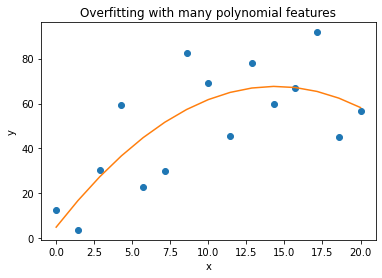

In [108]:
import matplotlib.pyplot as plt
plt.plot(X,y, 'o', label = "true")
plt.plot(X,y_pred, label = "overfitted model")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Overfitting with many polynomial features')

# Let's fix this using regularization!

## Ridge

In [109]:
# import

In [110]:
from sklearn.linear_model import Ridge

In [111]:
m_ridge = Ridge(alpha=0.4)
m_ridge.fit(X_poly, y)
ypred_ridge = m_ridge.predict(X_poly)



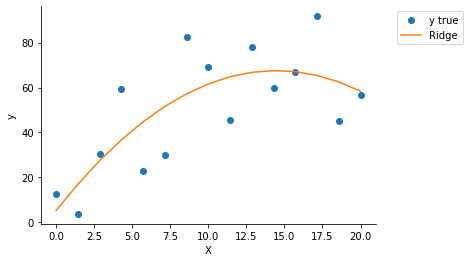

In [112]:
###### plot
plt.plot(X,y, 'o', label = 'y true')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X, ypred_ridge, label = 'Ridge')
plt.legend(bbox_to_anchor=(1.05, 1))    
sns.despine()

### The alpha parameter in Ridge

In [113]:
import seaborn as sns
import itertools

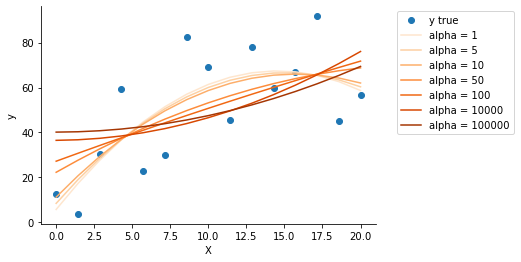

In [114]:
plt.plot(X,y, 'o', label = 'y true')
plt.xlabel('X')
plt.ylabel('y')

alphas = [1,5,10,50,100,10000, 100000]
palette = itertools.cycle(sns.color_palette("Oranges", len(alphas)))

for i in alphas:
    m_ridge = Ridge(alpha = i)
    m_ridge.fit(X_poly, y)  #Train the linear model with ridge regularization
    ypred_ridge = m_ridge.predict(X_poly)
    plt.plot(X, ypred_ridge, c = next(palette), label = f'alpha = {i}')
plt.legend(bbox_to_anchor=(1.05, 1))    
sns.despine()

## Lasso

In [115]:
from sklearn.linear_model import Lasso

In [116]:
m_lasso = Lasso(alpha=0.4)
m_lasso.fit(X_poly,y)
ypred_lasso = m_lasso.predict(X_poly)

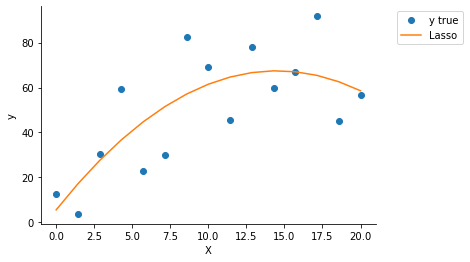

In [117]:
######### Plot
plt.plot(X,y, 'o', label = 'y true')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X, ypred_lasso, label = 'Lasso')
plt.legend(bbox_to_anchor=(1.05, 1))    
sns.despine()

### The alpha parameter in Lasso

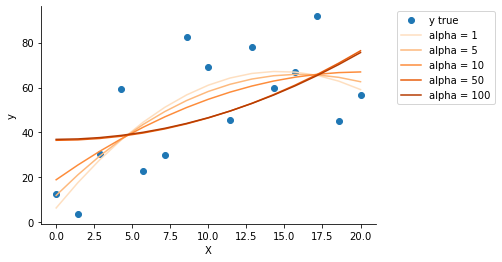

In [118]:
plt.plot(X,y, 'o', label = 'y true')
plt.xlabel('X')
plt.ylabel('y')

alphas = [1,5,10,50,100]
palette = itertools.cycle(sns.color_palette("Oranges", len(alphas)))

for i in alphas:
    m_lasso = Lasso(alpha = i)
    m_lasso.fit(X_poly, y)  #Train the linear model with ridge regularization
    ypred_lasso = m_lasso.predict(X_poly)
    plt.plot(X, ypred_lasso, c = next(palette), label = f'alpha = {i}')
    
plt.legend(bbox_to_anchor=(1.05, 1))    
sns.despine()

## Let's see all together in action

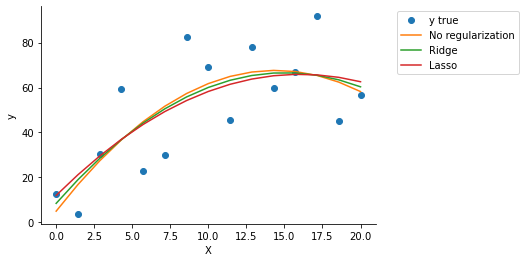

In [119]:
plt.plot(X,y, 'o', label = 'y true')
plt.xlabel('X')
plt.ylabel('y')

m_ridge = Ridge(alpha=5.0)
m_lasso = Lasso(alpha=5.0)

lm.fit(X_poly, y)        #Train the linear model
m_ridge.fit(X_poly, y)  #Train the linear model with ridge regularization
m_lasso.fit(X_poly, y)  #Train the linear model with lasso regularization

ypred = lm.predict(X_poly)
ypred_ridge = m_ridge.predict(X_poly)
ypred_lasso = m_lasso.predict(X_poly)

plt.plot(X, ypred, label = "No regularization")
plt.plot(X, ypred_ridge, label = "Ridge")
plt.plot(X, ypred_lasso, label = "Lasso")
plt.legend(bbox_to_anchor=(1.05, 1))    
sns.despine()

In [120]:
lm.coef_ #Linear Regression coefficients without Regularization

array([ 0.        ,  8.7050596 , -0.30202884])

In [121]:
m_ridge.coef_ #Linear Regression coefficients WITH Ridge Regularization

array([ 0.        ,  7.73545146, -0.25693269])

In [122]:
m_lasso.coef_ #Linear Regression coefficients WITH Lasso Regularization. NOTE: some were eliminated!

array([ 0.        ,  6.73158633, -0.20994872])

In [126]:
from sklearn.model_selection import cross_val_score
cross_val_score(lm, X_poly, y,cv = 5)

array([ 0.32231083, -1.32925536, -0.7069134 , -0.138015  ,  0.13030193])